In [1]:
import pandas as pd
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib
from matplotlib import pyplot as plt


In [2]:
#Time Series
n = 10000
n_samples = np.linspace(0,n-1,n) 

white_noise = np.random.normal(0, 1, n) # white noise with 10000 samples
s_data = np.sign(white_noise) #desired time serie, a white noise between -1 and 1 with mean=0, stddev=1 and n samples
s_data_nl = np.arctan(s_data) #desired time serie with nonlinearity

x_input = lfilter([1, 0.6, 0, 0.2], 1, s_data) #filtered input time serie
x_input_nl = lfilter([1, 0.6, 0, 0.2], 1, s_data_nl) #filtered input time serie

In [4]:
s_data[0:10]

array([ 1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.])

In [5]:
s_data_nl[0:10]

array([ 0.78539816,  0.78539816, -0.78539816, -0.78539816, -0.78539816,
       -0.78539816,  0.78539816,  0.78539816, -0.78539816, -0.78539816])

In [27]:
x_input[0:10]

array([ 1. , -0.4,  0.4,  1.8, -0.6, -1.4,  0.6,  1.4,  1.4, -0.2])

In [28]:
x_input_nl[0:10]

array([ 0.78539816, -0.31415927,  0.31415927,  1.41371669, -0.4712389 ,
       -1.09955743,  0.4712389 ,  1.09955743,  1.09955743, -0.15707963])

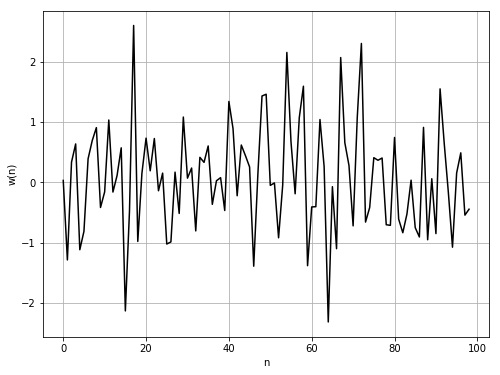

In [14]:
#White Noise Plot 
fig = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], white_noise[0:99], color='black')
plt.xlabel('n')
plt.ylabel('w(n)')

plt.grid()
plt.show()


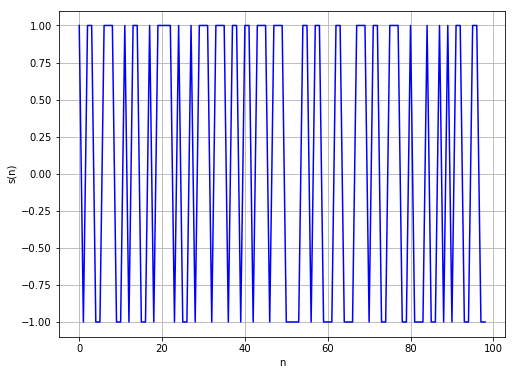

In [15]:
#Desired Time Serie Plot (White Noise between -1 and 1)
fig2 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], s_data[0:99], color='blue')
plt.xlabel('n')
plt.ylabel('s(n)')

plt.grid()
plt.show()

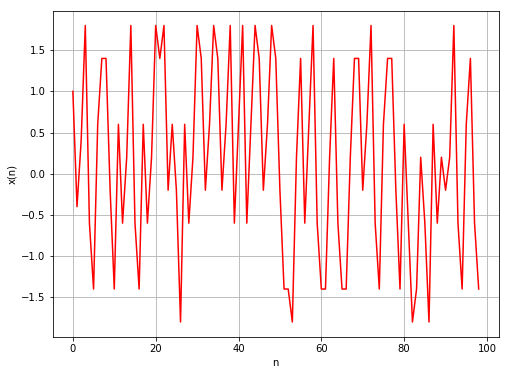

In [45]:
#Input Time Serie Plot (Filtered Time Serie)
fig3 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], x_input[0:99], color='red')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.grid()
plt.show()

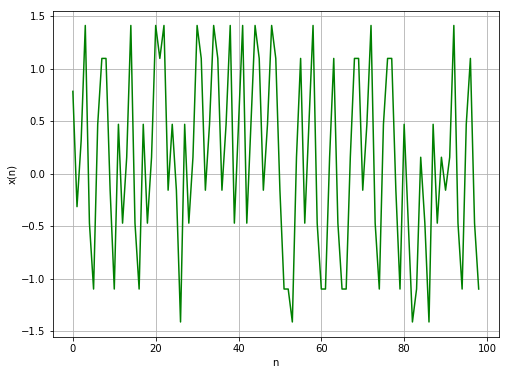

In [44]:
#Input Time Serie Plot (Filtered Time Serie)
fig4 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], x_input_nl[0:99], color='green')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.grid()
plt.show()

In [18]:
def PLR(s_data, x_input, lr):
    
    wind = 3
    winx = 2
    xm = np.zeros(winx) 
    x_data = np.append(xm, x_input)
 
    winy = 3
    y_input = np.zeros(winy)
    
    a = np.zeros(wind)
    b = np.zeros(wind)
   
    wtheta = np.append(a,b)
   
    for k in range(0,len(x_input)):
    #for k in range(0,len(x_input[winx:])-1):
        
        y_temp = y_input[k:wind+k]
        y = y_temp[::-1] #reverse y_temp
        
        x_temp = x_data[k:wind+k]
        x = x_temp[::-1] #reverse x_temp
      
        phi = np.append(y,x)
        y_n = np.dot(wtheta, phi)
        
        error = s_data[k] - y_n  
        wtheta_out = wtheta + lr*phi*error
    
        wtheta = wtheta_out
        y_input = np.append(y_input,y_n)
     
    
    y_out = y_input[winy:]

    
    return wtheta_out, y_out

In [17]:
def PLR_NL(s_data, x_input, lr):
    
    wind = 3
    winx = 2
    xm = np.zeros(winx) 
    x_data = np.append(xm, x_input)
 
    winy = 3
    y_input = np.zeros(winy)
    
    a = np.zeros(wind)
    b = np.zeros(wind)
   
    wtheta = np.append(a,b)
   
    for k in range(0,len(x_input)):
    #for k in range(0,len(x_input[winx:])-1):
        y_temp = y_input[k:wind+k]
        y = y_temp[::-1] #reverse y_temp
        
        x_temp = x_data[k:wind+k]
        x = x_temp[::-1] #reverse x_temp
        
        phi = np.append(y,x)
        y_n = np.dot(wtheta, phi)
        y_nl = np.arctan(y_n) 
        
        error = s_data[k] - y_nl 
        wtheta_out = wtheta + lr*phi*error
        
        wtheta = wtheta_out
        y_input = np.append(y_input,y_nl)
    
    
    y_out = y_input[winy:]
    
    
    return wtheta_out, y_out

In [15]:
def EQM(s_data, y_data):
    
    esignal = []
    
    for k in range(0,len(y_data)):
        esample = (y_data[k] - s_data[k])**2
        esignal.append(esample)
    
    eqm_temp = np.sum(esignal)
    eqm = eqm_temp/len(y_data)


    return eqm

In [24]:
wtheta, y_plr = PLR(s_data, x_input, 0.02)

In [22]:
wtheta_plr_nl, y_plr_nl = PLR_NL(s_data_nl, x_input_nl, 0.02)

In [23]:
eqm_plr_nl = EQM(s_data_nl, y_plr_nl)
eqm_plr_nl

0.0045789215652032918

In [25]:
eqm_plr = EQM(s_data, y_plr)
eqm_plr

0.0051644476187291313